# Вычислительная математика
## Погрешности вычислений и численное дифференцирование

Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Организация курса
* Курс рассчитан на 2 семестра
* В каждом семестре 2 контрольные — полусеместровая на семинаре и семестровая на лекции
* После каждой контрольной сдача задания

## Бально-рейтинговая система
* Посещение лекций - 10 баллов
* Полусеместровая контрольная - 20 баллов 
* Семестровая контрольная - 30 баллов 
* Каждое задание - 20 баллов
  * Решенные задачи из задавальника - 10 баллов
  * Лабы по темам или задачи для программирования - 10 баллов
* Активность на семинарах - до 10 баллов
  * Работа у доски
  * Задачи со звездочками из задания и контрольной

Оценка = Баллы / 10 округленные вниз

## Материалы
 * [Курс на сайте кафедры](https://mipt.ru/education/chair/computational_mathematics/study/materials/compmath/)
 * [Репозиторий с презентациями на GitHub](https://github.com/CompMathGroup/compmath-slides)
 * [Группа ВК](https://vk.com/mipt_compmath)


## Предмет вычислительной математики
Разделы вычислительной математики
 * Численный анализ
 * Вычислительная линейная алгебра
 * Численное решение дифференциальных уравнений
 * Вычислительная физика
 
Для вычислительных задач ответом обычно является _число_, а также _погрешность_ ответа.

## Машинная арифметика
Вычислительная техника оперирует числами с конечным числом (двоичных) цифр (числа с плавающей точкой, floating-point values)
$$
x = \pm\overline{1.b_1 b_2 \dots b_K} \cdot 2^e
$$
Сравните с научной нотацией для записи чисел
$$
x = 1.2345 \cdot 10^6
$$
Числа в машинном представлении имеют _фиксированное число значащих цифр_, равное $K+1$.


## Погрешность машинного представления
Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right], \qquad X = \pm\overline{1.b_1 b_2 \dots b_K} \cdot 2^e\\
\Delta X \leqslant  \frac{1}{2} 2^{-K} \cdot 2^e \leqslant |X| \cdot 2^{-K-1}
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:
$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-K-1}
$$

## Одинарная и двойная точность
Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$

## Погрешность при вычислении функции
Пусть $x^*$ — результат измерения величины $x$ с погрешностью $\Delta x$ (то есть $|x^* - x | \leqslant \Delta x$). Пусть также $f(x)$ — некоторая функция. Интересует насколько $y = f(x)$ может отличаться от $y^* = f(x^*)$.

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа
$$f(x) = f(x^*) + f'(\xi) (x - x^*), \quad \xi \in [x, x^*]$$
Отсюда следует оценка $|y - y^*| \leqslant |f'(\xi)| \Delta x$, содержащая неизвестную точку $\xi$.
$$
|y - y^*| \leqslant |f'(\xi)| \Delta x \leqslant \Delta x \cdot \max_{\xi \in [x^* - \Delta x, x^* + \Delta x]} |f'(\xi)|
$$

Из формулы Тейлора в форме Коши
$$
f(x) = f(x^*) + f'(x^*) (x - x^*) + O((x - x^*)^2)
$$
также можно получить оценку, если пренебречь слагаемым $O(\Delta x^2).$

В этом случае оценка имеет вид
$$
f(x) \approx f(x^*) + f'(x^*) (x - x^*)\\
|y - y^* | \lesssim |f'(x^*)| \Delta x
$$
Эта оценка погрешности — приближенная, она позволяет составить представление об ошибке, но пользоваться ей необходимо аккуратно. Например, если вдруг $f'(x^*) = 0$, эта оценка теряет смысл.

## Приближенные методы
Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**.

Например, рассмотрим метод вычисления функции $e^x$, основанный на формуле Тейлора в окрестности $x = 0$.
$$
e^x \approx 1 + x + \frac{x^2}{2} + \dots = \sum_{k = 0}^{n-1} \frac{x^k}{k!}.
$$
Отметим, что число $n$ является параметром метода.

## Суммирования ряда Тейлора
С помощью формулы Тейлора с остаточным членов в форме Лагранжа удается оценить ошибку такого метода:
$$
S_n = \sum_{k=0}^{n-1} \frac{x^k}{k!}\\
e^x = 1 + x + \dots + \frac{x^{n-1}}{(n-1)!} + e^{\xi}\frac{x^n}{n!}, \quad \xi \in [0, x]\\
|e^x - S_n| \leqslant \max(1, e^x) \frac{|x|^n}{n!} \equiv \varepsilon_\text{method}
$$
Несложно видеть, что при $n \to \infty$ ошибка метода стремится к нулю.

Если ряд является знакопеременным, как например, для функции $\sin x$
$$
\sin x \approx S_n = x - \frac{x^3}{6} + \frac{x^5}{120} + \dots = \sum_{k=0}^{n-1} (-1)^k\frac{x^{2k+1}}{(2k+1)!},
$$
в качестве ошибки метода можно использовать первое отброшенное слагаемое: 
$$
|\sin x - S_n| \leqslant \left|\frac{x^{2n+1}}{(2n+1)!}\right|.
$$
Такая оценка справедлива, если все отброшенные слагаемые знакопеременного ряда монотонно убывают по модулю.

In [1]:
def myexp(x, n):
    S = 0.
    a = 1.
    for k in range(n):
        S += a
        a *= x / (k + 1)
    return S

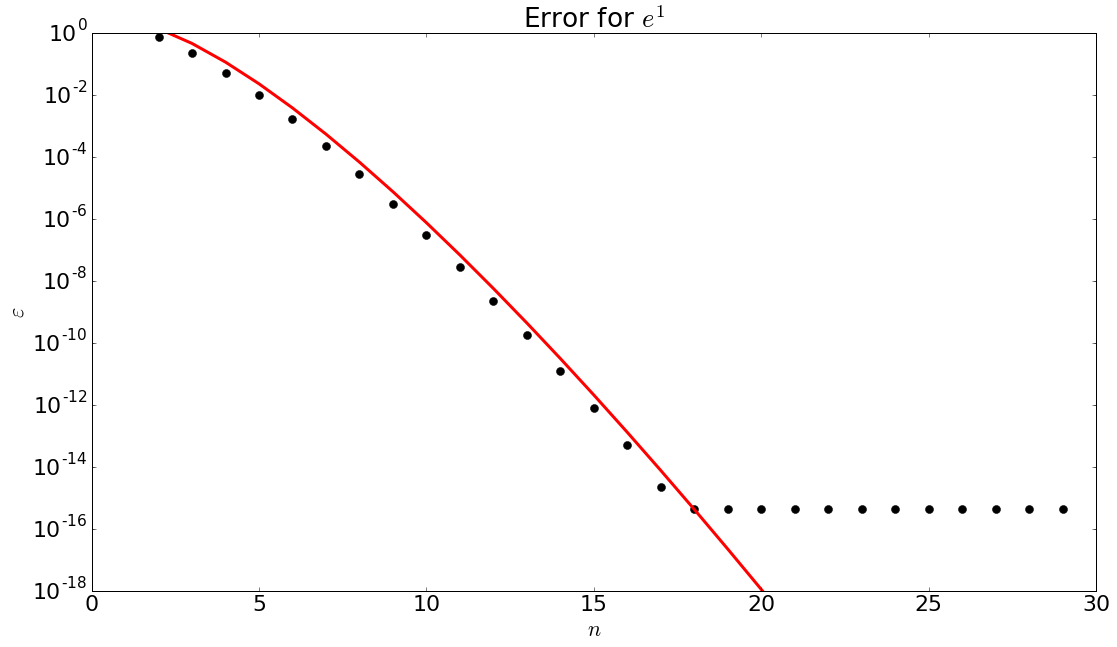

In [6]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

x = 1
ns = []; errs = [];
for n in range(30):
    ns.append(n)
    errs.append(abs(np.exp(x) - myexp(x, n)))
ns = np.array(ns)

plt.figure(figsize=(18, 10))
plt.semilogy(ns, errs, 'k.', ms=16)
plt.semilogy(ns, max(1, np.exp(x)) * x**ns / gamma(ns+1), 'r', lw=3)
plt.ylim([1e-18, 1])
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.title('Error for $e^{%g}$' % x)
plt.show()

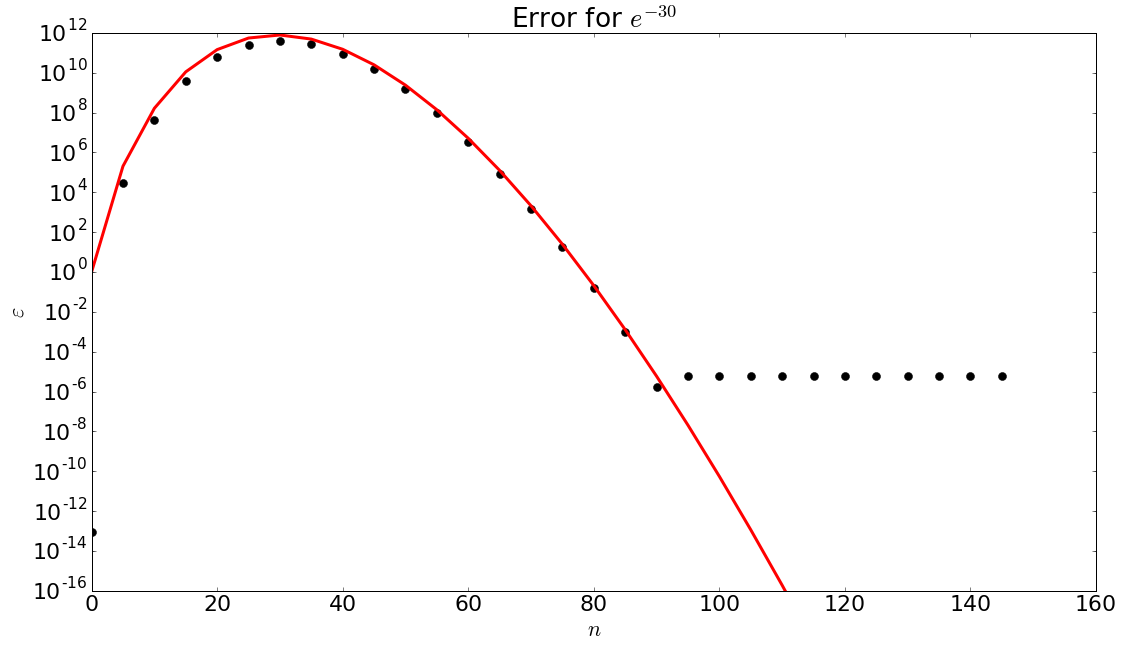

In [7]:
from scipy.special import loggamma
ns = []; errs = [];
x = -30
for n in range(0, 150, 5):
    ns.append(n)
    errs.append(abs(np.exp(x) - myexp(x, n)))
ns = np.array(ns)
plt.figure(figsize=(18, 10))
plt.semilogy(ns, errs, 'k.', ms=16)
plt.semilogy(ns, max(1, np.exp(x)) * np.exp(ns * np.log(abs(x)) \
                            - np.real(loggamma(ns+1))), 'r-', lw=3)
plt.ylim([1e-16, 1e12])
plt.title('Error for $e^{%g}$' % x)
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.show()

## Накопление ошибок округления
Cуммируя величину $\displaystyle S_n = \sum_{k=0}^{n-1} a_n$
в машинной арифметике, мы на самом деле суммируем *округленные* величины. Каждое слагаемое $a_n$ представлено с абсолютной погрешностью $\Delta a_n \leqslant |a_n| \cdot \delta$, где $\delta$ — относительная ошибка округления. 

Так как при суммировании чисел их абсолюная погрешность суммируется, при вычислении $S_n$ накопится ошибка
$$
\Delta S_n \leqslant \varepsilon_\text{round} = \sum_{k=0}^{n-1} |a_n| \cdot \delta = \delta \cdot \sum_{k=0}^{n-1} |a_n|.
$$

При вычислении $e^{-30} \approx 9.35 \cdot 10^{-14}$ в худшем случе накапливается ошибка
$$
\varepsilon_\text{round} = \delta \cdot \sum_{k=0}^{n-1} \frac{|x|^k}{k!} \approx \delta \sum_{k=0}^{\infty}
\frac{|x|^k}{k!} = \delta e^{|x|} \approx 1.1 \cdot 10^{-3}
$$
Фактически, ошибка превосходит результат на $10$ порядков.

Заметим, что для знакопостоянного ряда такого случиться не могло:
$$
\Delta S_n \leq \delta \sum_{k=0}^{n-1} |a_n| = \delta \left|\sum_{k=0}^{n-1} a_n\right| = \delta |S_n|
\implies \frac{\Delta S_n}{|S_n|} \leq \delta.
$$

## Численное дифференцирование
Дана функция $f(x)$ в виде черного ящика: ее можно вычислять в различных точках $x$ и получать резлультат с погрешностью $\Delta f$. Известно, что функция достаточно гладкая, но конкретный вид функции не задан. Необходимо получить значение ее производной $f'(x)$ в точке $x_0$.

Вспомним определение производной
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}.
$$

## Конечные разности
Рассмотрим в качестве приближенного метода
$$
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$
при некотором значении $h > 0$. Интуитивно понятно, что чем меньше $h$, тем точнее метод. Покажем это, найдя ошибку метода. Для этого нужно оценить величину
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|
$$

## Оценка ошибки метода для конечных разностей

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:
$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h].\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}.
$$
Пусть известно, что $|f''(\xi)| \leq M_2$. Тогда ошибку метода можно оценить как
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
$$

Из оценки
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
$$
видно, что ошибка метода стремится к нулю при $h \to 0$, причем $ \varepsilon_\text{method} = O(h)$.

Говорят, что данный метод имеет *первый порядок*, так как его ошибка стремится к нулю как первая степень величины $h$, которую называют *шагом дифференцирования*

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$
Пользуясь такими же разложениями
$$
f(x_0 \pm h) = f(x_0) \pm f'(x_0) h + \frac{f''(x_0)}{2} h^2 \pm \frac{f'''(\xi_{1,2})}{6} h^3,\\
\xi_1 \in [x_0 - h, x_0], \xi_2 \in [x_0, x_0 + h],
$$
заключаем, что
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| = \frac{|f'''(\xi_2) + f'''(\xi_1)|h^2}{12},\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| \leqslant  \varepsilon_\text{method} = \frac{M_3 h^2}{6}, \qquad M_3 = \max |f'''(\xi)|
$$
Отметим, что данный метод имеет *второй порядок*, так как $\varepsilon_\text{method} = O(h^2)$.

In [4]:
def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

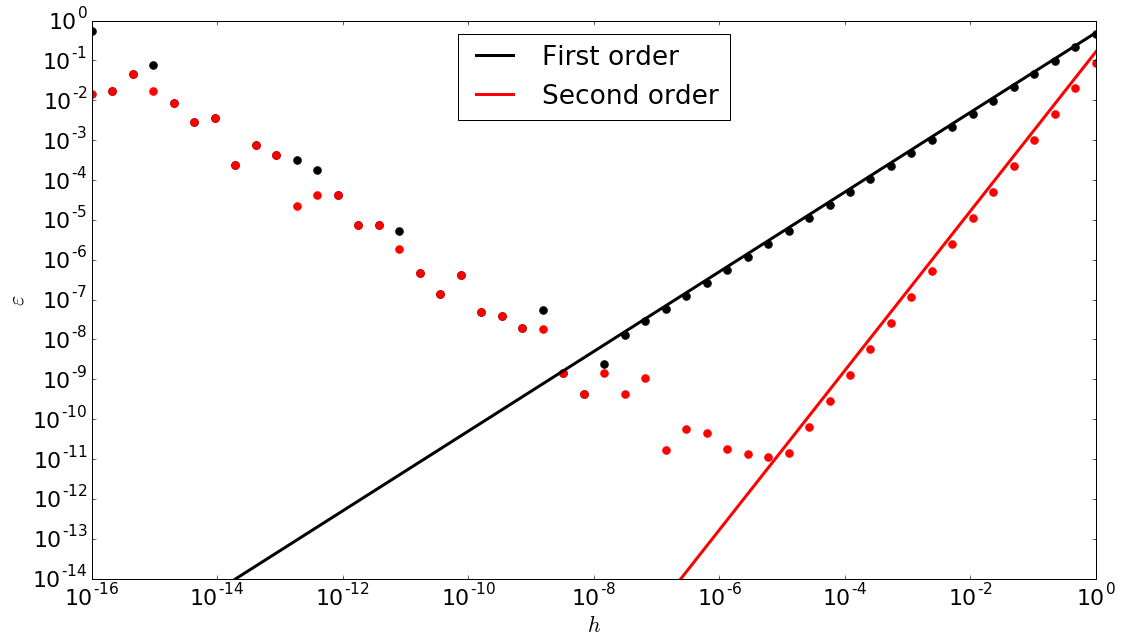

In [8]:
hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1
errs1 = []
errs2 = []
for h in hs:
    errs1.append(abs(diff1(np.sin, 1, h) - np.cos(1)))
    errs2.append(abs(diff2(np.sin, 1, h) - np.cos(1)))

M2 = M3 = 1
plt.figure(figsize=(18, 10))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()

## Погрешности при дифференцировании

Вспомним, что функция $f(x)$ вычисляется с погрешностью $\Delta f$. При вычислении
$$f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
из-за приближенных значений $f(x_0 + h)$ и $f(x_0)$ появляется ошибка
$$
\varepsilon_\text{comp} = \frac{2\Delta f}{h}
$$
соответственно. Эта ошибка при уменьшении $h$ *растет* как $O(h^{-1})$. 

## Оптимальный шаг дифференцирования

При дифференцировании функции имеются два основных источника погрешности
 * Ошибка метода — уменьшается при уменьшении $h$
 * Ошибка вычислений — растет при уменьшении $h$
 
Поскольку характер роста ошибок различный, существует неокторое значение $h^*$, при котором ошибка минимальна. Рассмотим полную ошибку $$
\varepsilon_\text{total} = \varepsilon_\text{method} + \varepsilon_\text{comp}
$$
как функцию от $h$ и найдем минимум.

Продифферецируем полную ошибку
$$
\varepsilon_{\text{total}}(h) = \frac{M_2h}{2} + \frac{2\Delta f}{h}\\
$$
по $h$:
$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_2}{2} - \frac{2\Delta f}{{h^*}^2}\\h^* = 2\sqrt\frac{\Delta f}{M_2}
$$

Для функции $f(x) = \sin x$ оценки производных $M_2 = M_3 = 1$. Также примем $\Delta f = 10^{-16}$. При этом
$$
h^* = 2 \cdot 10^{-8}, \qquad \varepsilon_{\text{total}}^* = 2\cdot 10^{-8}
$$

Проделав то же самое для формулы дифференцирования второго порядка, получаем
$$
\varepsilon_{\text{total}}(h) = \frac{M_3h^2}{6} + \frac{2\Delta f}{2h}\\
$$
по $h$:
$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_3h^*}{3} - \frac{\Delta f}{{h^*}^2}\\h^* = \sqrt[3]\frac{3\Delta f}{M_3}
$$

При тех же значениях $M_2, M_3$ и $\Delta f$ получаем
$$
h^* \approx 6.69 \cdot 10^{-6}, \qquad \varepsilon_{\text{total}}^* \approx 2.24\cdot 10^{-11}
$$

Хорошо видно, что метод второго порядка позволил добиться более высокой точности при большем шаге дифференцирования.

Методы повышеного порядка обычно позволяют
* добиться большей точности при меньших вычислительных затаратах
* получить более точный результат в рамках той же точности вычислений